In [1]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import scipy as stats
from scipy.stats import zscore
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
#importing nltk libraries
import nltk
from nltk.corpus import stopwords
import re
import string
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import FreqDist#Reading csv file 

In [3]:
#Reading csv file 
df = pd.read_csv("R_P.csv")
df

,Unnamed: 0,Review_Title,Review_Text,Ratings
0,0,NaN,NaN,NaN
1,1,Camera is not good,"\n Nice product, but camera quality is very p...",3.0 out of 5 stars
2,2,Windows 11 upgrade is not available for this s...,\n System comes with Windows 10. It was menti...,1.0 out of 5 stars
3,3,Worst display,\n The monitor has TN panel. Worst viewing an...,1.0 out of 5 stars
4,4,amazing product,"\n After 2 days of use, I'm giving 5 stars to...",5.0 out of 5 stars
...,...,...,...,...
79883,79883,Great product,If you want to get a bigger monitor in the bud...,5
79884,79884,Worth every penny,Good product with good price . I recommend to ...,5
79885,79885,Awesome,Best in this Budget,5
79886,79886,Simply awesome,Very good picture quality,5


 In this perticular dataset we have about 79888 rows and 4 columns Unnamed: 0 is the index column of csv file so let's drop that column

Ratings is my target column and it is a categorical column with 5 categories so this problem is a Multi Classification Problem.

Feature Information:
    1. Review_Title : Title of the Review.
    2. Review_Text : Text Content of the Review.
    3. Ratings : Ratings out of 5 stars.

In [4]:
# Dropping unnecessary column
df.drop(columns = 'Unnamed: 0',inplace = True)

In [5]:
# Checking the shape of the dataset
print("There are {} Rows and {} Columns in the dataset".format(df.shape[0], df.shape[1]))

There are 79888 Rows and 3 Columns in the dataset


In [6]:
# Let's check the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79888 entries, 0 to 79887
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Review_Title  65205 non-null  object
 1   Review_Text   66818 non-null  object
 2   Ratings       65206 non-null  object
dtypes: object(3)
memory usage: 1.8+ MB


In [7]:
# Checking for null values
df.isnull().sum()

Review_Title    14683
Review_Text     13070
Ratings         14682
dtype: int64

So we have a huge number of nan values in the dataset. Let's replace them using imputation methods.

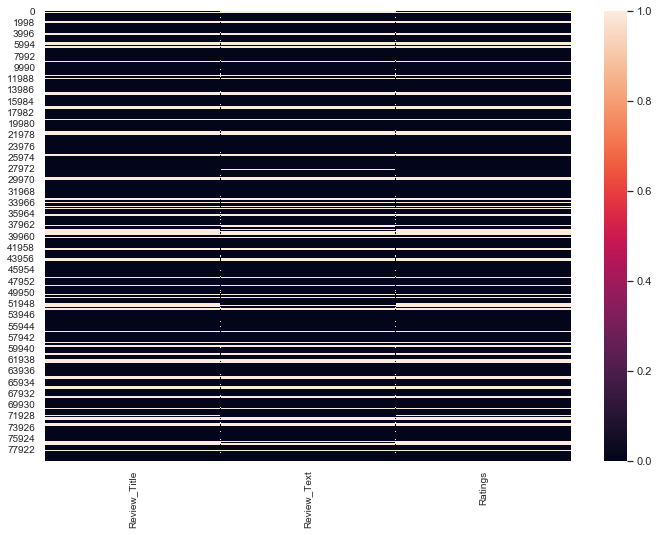

In [8]:
# Let's visualize the null values clearly in dataset using heat map
sns.set(rc={'figure.figsize':(11.8,8.27)})
sns.heatmap(data=df.isnull())
plt.xticks(rotation=90, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.show()

In [9]:
#Checking the mode of Review_Title column
df["Review_Title"].mode()

0    Good
dtype: object

So the highest occuring Review_Title is Good, we have to replace the nan values in Review_Title column with it's mode.

In [10]:
#Checking the mode of Review_Text column
df["Review_Text"].mode()

0    \n  Good\n
dtype: object

So the highest occuring Review_Text is Good, we have to replace the nan values in Review_Text column with it's mode.

In [11]:
#Checking the value counts of Ratings column
df.Ratings.value_counts()

5.0 out of 5 stars    15743
1.0 out of 5 stars    13490
4.0 out of 5 stars    13441
3.0 out of 5 stars    11607
2.0 out of 5 stars    10026
5                       587
4                       197
1                        55
3                        51
2                         9
Name: Ratings, dtype: int64

Since the highest count in Ratings column is for 5 followed by 5.0 out of 5 starts and they both are same so it is clear the mode for Ratings column is 5.



In [12]:
#Checking the mode
df["Ratings"].mode()

0    5.0 out of 5 stars
dtype: object

In [13]:
#Replacing naa values with there mode as all the columns are categorical
df["Review_Title"] = df["Review_Title"].fillna(df["Review_Title"].mode()[0])
df["Review_Text"] = df["Review_Text"].fillna(df["Review_Text"].mode()[0])
df["Ratings"] = df["Ratings"].fillna(df["Ratings"].mode()[0])

In [14]:
# Checking for null values again
df.isnull().sum()

Review_Title    0
Review_Text     0
Ratings         0
dtype: int64

Now successfully we have replaced all the nan values using imputation method.

In [15]:
# Checking the unique value count of target column
df['Ratings'].unique()

array(['5.0 out of 5 stars', '3.0 out of 5 stars', '1.0 out of 5 stars',
       '4.0 out of 5 stars', '2.0 out of 5 stars', '4', '5', '1', '2',
       '3'], dtype=object)

Looking the above entries in target column we came to know that we need to replace the string entries to there respective values(stars).

In [16]:
# Replacing the string entries in target column
df['Ratings'] = df['Ratings'].replace('1.0 out of 5 stars',1)
df['Ratings'] = df['Ratings'].replace('2.0 out of 5 stars',2)
df['Ratings'] = df['Ratings'].replace('3.0 out of 5 stars',3)
df['Ratings'] = df['Ratings'].replace('4.0 out of 5 stars',4)
df['Ratings'] = df['Ratings'].replace('5.0 out of 5 stars',5)
df['Ratings'] = df['Ratings'].astype('int')

In [17]:
# Checking the unique value count of target column again
df['Ratings'].unique()

array([5, 3, 1, 4, 2])

Now the target column looks good for our analysis.

In [18]:
# Combining Review text and title
df['Review'] = df['Review_Title'].map(str)+' '+df['Review_Text']

In [19]:
df

,Review_Title,Review_Text,Ratings,Review
0,Good,\n Good\n,5,Good \n Good\n
1,Camera is not good,"\n Nice product, but camera quality is very p...",3,"Camera is not good \n Nice product, but camer..."
2,Windows 11 upgrade is not available for this s...,\n System comes with Windows 10. It was menti...,1,Windows 11 upgrade is not available for this s...
3,Worst display,\n The monitor has TN panel. Worst viewing an...,1,Worst display \n The monitor has TN panel. Wo...
4,amazing product,"\n After 2 days of use, I'm giving 5 stars to...",5,"amazing product \n After 2 days of use, I'm g..."
...,...,...,...,...
79883,Great product,If you want to get a bigger monitor in the bud...,5,Great product If you want to get a bigger moni...
79884,Worth every penny,Good product with good price . I recommend to ...,5,Worth every penny Good product with good price...
79885,Awesome,Best in this Budget,5,Awesome Best in this Budget
79886,Simply awesome,Very good picture quality,5,Simply awesome Very good picture quality


Since we have obtained Review from Review_Title and Review_Text let's drop Review_Title and Review_Text. If not they'll create multicolinearity issue.

In [20]:
# Dropping unnecessary column
df.drop(columns = 'Review_Title',inplace = True)
df.drop(columns = 'Review_Text',inplace = True)

In [21]:
# Checking data of first row in Review column
df['Review'][2]

'Windows 11 upgrade is not available for this system \n  System comes with Windows 10. It was mentioned that I can upgade to Windows 11.<br>But when we try to upgrade to Windows11, it is just taking us to the page for checking compatibility.<br>We called the customer care twice. They just asked us to go to system settings and give permission for auto upgrade. Even after doing so there is no progress. Waited for a month now. Still the same issue.\n'

In [22]:
df['Review'][1]

'Camera is not good \n  Nice product, but camera quality is very poor.\n'

In [23]:
#Here I am defining a function to replace some of the contracted words to their full form and removing urls and some unwanted text 
def decontracted(text):
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"don’t", "do not", text)
    text = re.sub(r"can't", "can not", text)
    text = re.sub(r"im ", "i am", text)
    text = re.sub(r"yo ", "you ",text)
    text = re.sub(r"doesn’t", "does not",text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"<br>", " ", text)
    text = re.sub(r'http\S+', '', text) #removing urls
    return text

In [24]:
# Changing all words to there Lowercase
df['Review'] = df['Review'].apply(lambda x : x.lower())

df['Review'] = df['Review'].apply(lambda x : decontracted(x))

# Removing punctuations
df['Review'] = df['Review'].str.replace('[^\w\s]','')
df['Review'] = df['Review'].str.replace('\n',' ')

In [25]:
df['Review'][2]

'windows 11 upgrade is not available for this system    system comes with windows 10 it was mentioned that i can upgade to windows 11 but when we try to upgrade to windows11 it is just taking us to the page for checking compatibility we called the customer care twice they just asked us to go to system settings and give permission for auto upgrade even after doing so there is no progress waited for a month now still the same issue '

In [26]:
#Initialising lemmatizer
lemmatizer = nltk.stem.WordNetLemmatizer()

In [27]:
#Defining functiom to convert nltk tag to wordnet tags
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

In [28]:
#defining function to lemmatize our text
def lemmatize_sentence(sentence):
    #tokenize the sentence & find the pos tag
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x : (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatize_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            lemmatize_sentence.append(word)
        else:
            lemmatize_sentence.append(lemmatizer.lemmatize(word,tag))
    return " ".join(lemmatize_sentence)

In [29]:
df['Review'][2]


'windows 11 upgrade is not available for this system    system comes with windows 10 it was mentioned that i can upgade to windows 11 but when we try to upgrade to windows11 it is just taking us to the page for checking compatibility we called the customer care twice they just asked us to go to system settings and give permission for auto upgrade even after doing so there is no progress waited for a month now still the same issue '

In [30]:
#Noice removal
def scrub_words(text):
    #remove html markup
    text = re.sub("(<.*?>)", "", text)
    #remove non-ascii and digits
    text = re.sub("(\\W)", " ", text)
    text = re.sub("(\\d)", "", text)
    #remove white space
    text = text.strip()
    return text

In [31]:
df['Review'] = df['Review'].apply(lambda x : scrub_words(x))

In [32]:
df['Review'][2]

'windows  upgrade is not available for this system    system comes with windows  it was mentioned that i can upgade to windows  but when we try to upgrade to windows it is just taking us to the page for checking compatibility we called the customer care twice they just asked us to go to system settings and give permission for auto upgrade even after doing so there is no progress waited for a month now still the same issue'

Finally I have defined a function scrub_words for removing the noise from the text. It will remove any html markups, digits and white spaces from the text.

In [33]:
# Creating column for word counts in the text
df['Review_WordCount'] = df['Review'].apply(lambda x: len(str(x).split(' ')))
df[['Review_WordCount','Review']].head()

,Review_WordCount,Review
0,5,good good
1,15,camera is not good nice product but camera ...
2,84,windows upgrade is not available for this sys...
3,32,worst display the monitor has tn panel wors...
4,59,amazing product after days of use i am giv...


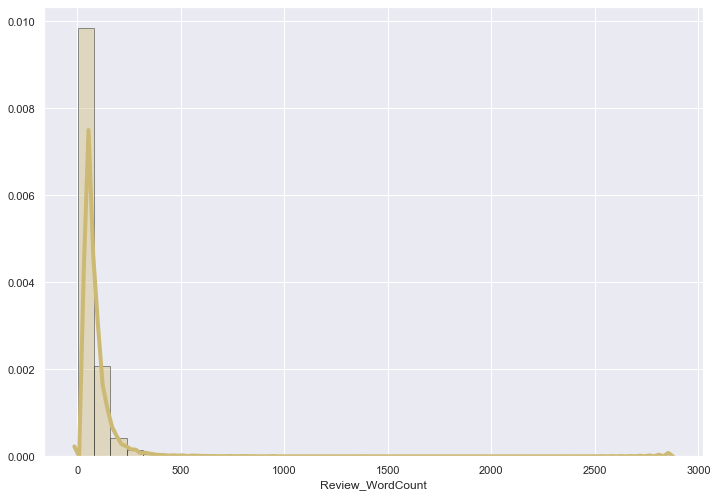

In [34]:
# density plot and histogram of Review word count
sns.distplot(df['Review_WordCount'], hist = True, kde = True,
            bins = int(180/5), color = 'y',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

In [35]:
# Creating column for character counts in the text
df['Review_ChaCount'] = df['Review'].str.len()
df[['Review_ChaCount','Review']].head()

,Review_ChaCount,Review
0,12,good good
1,66,camera is not good nice product but camera ...
2,424,windows upgrade is not available for this sys...
3,155,worst display the monitor has tn panel wors...
4,262,amazing product after days of use i am giv...


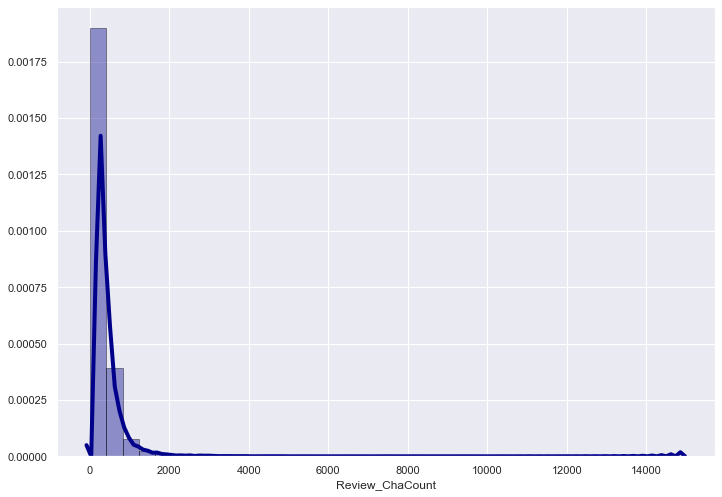

In [36]:
# density plot and histogram of all character count
sns.distplot(df['Review_ChaCount'], hist = True, kde = True,
            bins = int(180/5), color = 'darkblue',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()


In [37]:
#Checking the shape of the dataset
df.shape

(79888, 4)

In [38]:
# Applying zscore to remove outliers
from scipy import stats
from scipy.stats import zscore
z_score = zscore(df[['Review_WordCount']])
abs_z_score = np.abs(z_score)
filtering_entry = (abs_z_score < 3).all(axis = 1)
df = df[filtering_entry]
df.shape

(78613, 4)

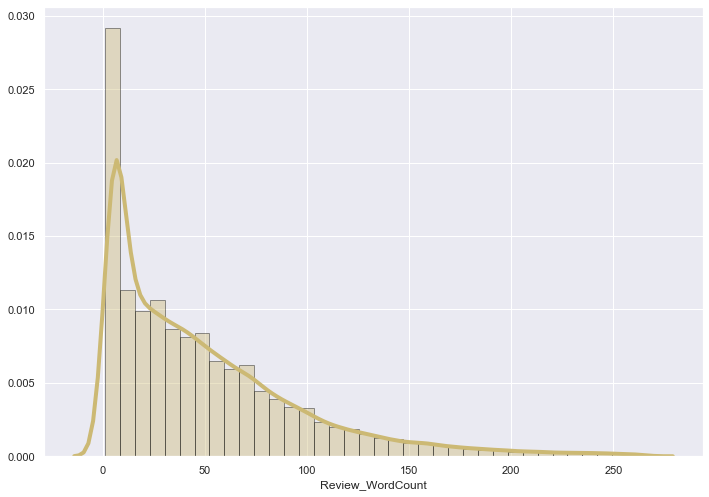

In [39]:
# density plot and histogram of Review word count
sns.distplot(df['Review_WordCount'], hist = True, kde = True,
            bins = int(180/5), color = 'y',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

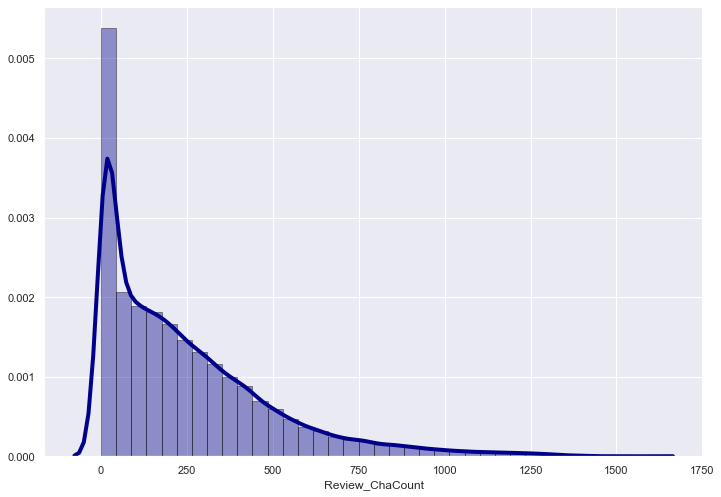

In [40]:
# density plot and histogram of all character count
sns.distplot(df['Review_ChaCount'], hist = True, kde = True,
            bins = int(180/5), color = 'darkblue',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

After plotting histograms for word counts and character counts and after removing outliers we can see we are left out with good range of number of words and characters.

In [41]:
#function to plot most frequent terms
def freq_words(x, terms = 30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()
    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()),
                             'count':list(fdist.values())})
    #selecting top 30 most freq words
    d = words_df.nlargest(columns = 'count', n = terms)
    plt.figure(figsize = (20,10))
    ax = sns.barplot(data = d, x='count', y='word')
    ax.set(ylabel = 'Word')
    plt.show()

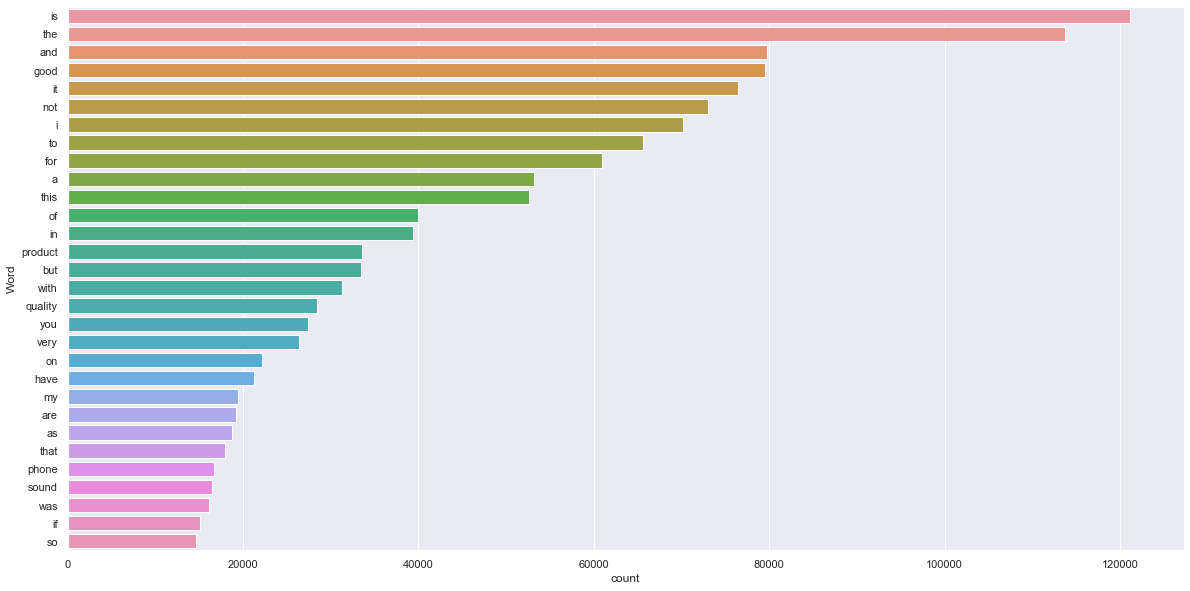

In [42]:
freq_words(df['Review'])

By seeing the above plot we can see that is, the, and......are occurring frequently.

In [43]:
#function to plot least frequent terms
def rare_words(x, terms = 30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()
    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()),
                             'count':list(fdist.values())})
    #selecting top 30 most freq words
    d = words_df.nsmallest(columns = 'count', n = terms)
    plt.figure(figsize = (20,10))
    ax = sns.barplot(data = d, x='count', y='word')
    ax.set(ylabel = 'Word')
    plt.show()

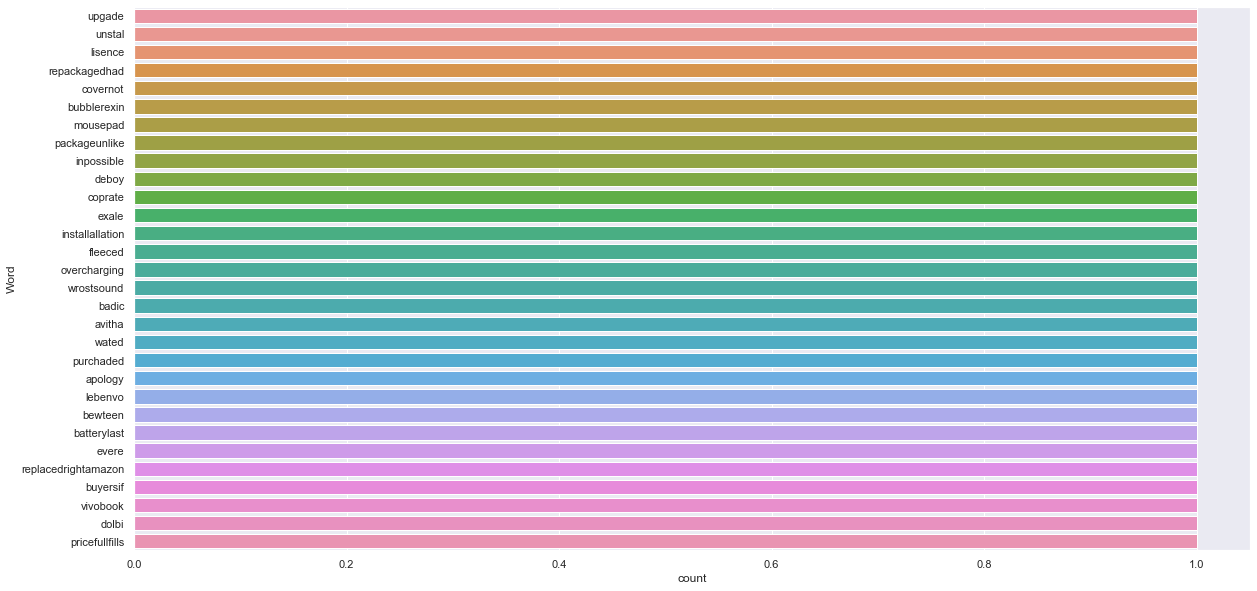

In [44]:
rare_words(df['Review'])

Above list of words are have rare occurance in Review.

In [45]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
                    background_color='white',
                    stopwords = stopwords,
                    max_words = 500,
                    max_font_size = 40,
                    scale = 3,
                    random_state = 1).generate(str(data))
    fig = plt.figure(1, figsize=(15,15))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud)
    plt.show()

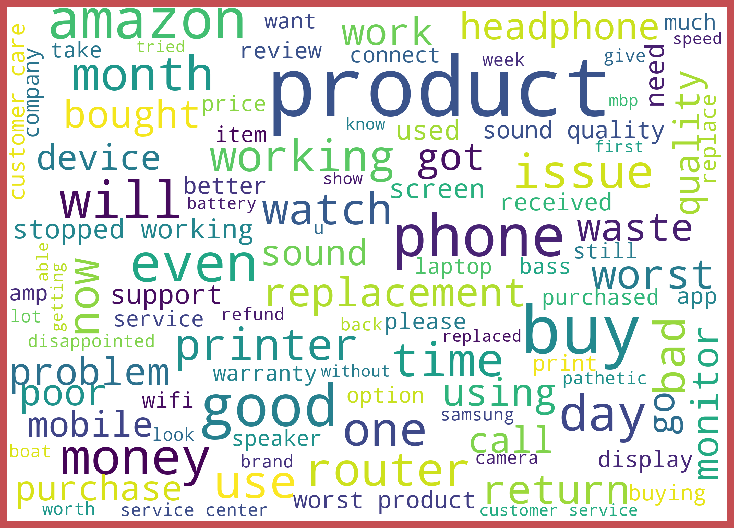

In [46]:
#Let's plot the loud words with Rating 1
from wordcloud import WordCloud

df1=df['Review'][df['Ratings']==1]

spam_cloud = WordCloud(width=700,height=500,background_color='white',stopwords = stopwords,max_words = 100,max_font_size = 80,scale = 3,random_state = 1).generate(' '.join(df1))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

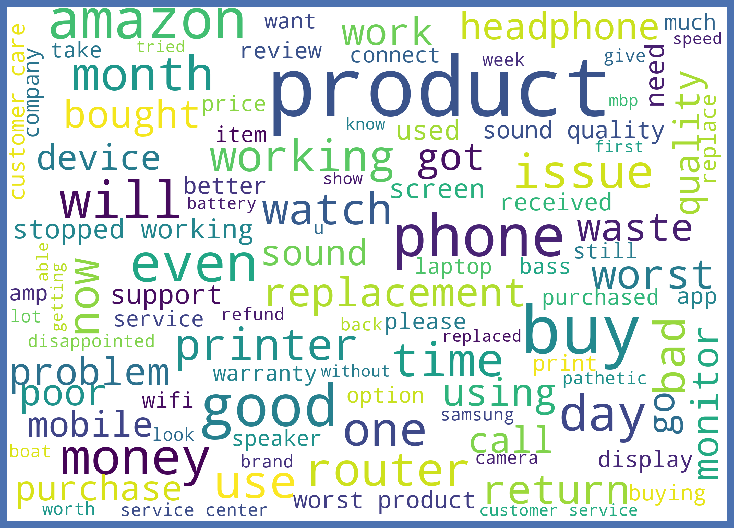

In [47]:
#Let's plot the loud words with Rating 2
from wordcloud import WordCloud

df2=df['Review'][df['Ratings']==2]

spam_cloud = WordCloud(width=700,height=500,background_color='white',stopwords = stopwords,max_words = 100,max_font_size = 80,scale = 3,random_state = 1).generate(' '.join(df1))

plt.figure(figsize=(10,8),facecolor='b')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

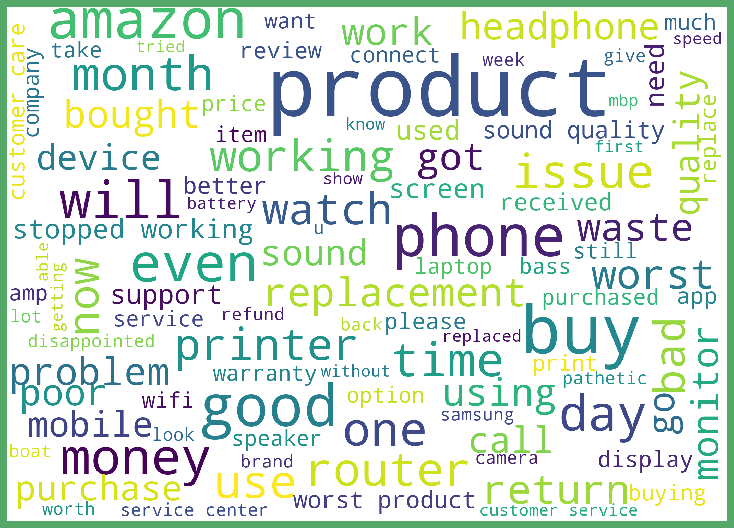

In [48]:
#Let's plot the loud words with Rating 3
from wordcloud import WordCloud

df3=df['Review'][df['Ratings']==3]

spam_cloud = WordCloud(width=700,height=500,background_color='white',stopwords = stopwords,max_words = 100,max_font_size = 80,scale = 3,random_state = 1).generate(' '.join(df1))

plt.figure(figsize=(10,8),facecolor='g')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

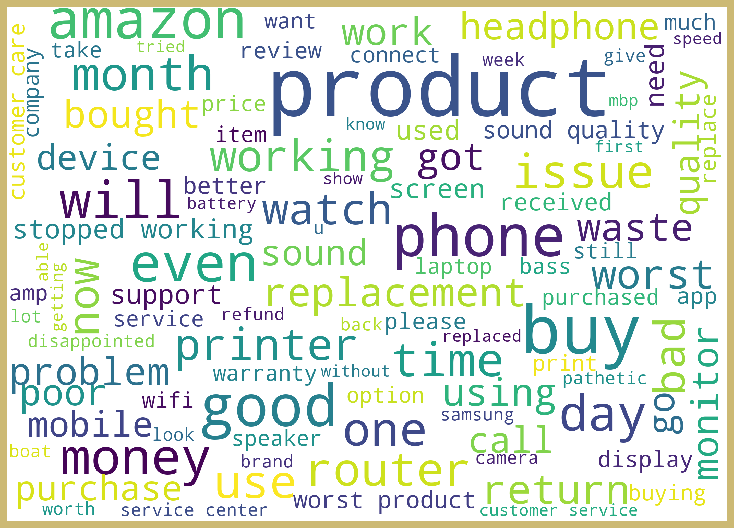

In [49]:
#Let's plot the loud words with Rating 4
from wordcloud import WordCloud

df4=df['Review'][df['Ratings']==4]

spam_cloud = WordCloud(width=700,height=500,background_color='white',stopwords = stopwords,max_words = 100,max_font_size = 80,scale = 3,random_state = 1).generate(' '.join(df1))

plt.figure(figsize=(10,8),facecolor='y')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)

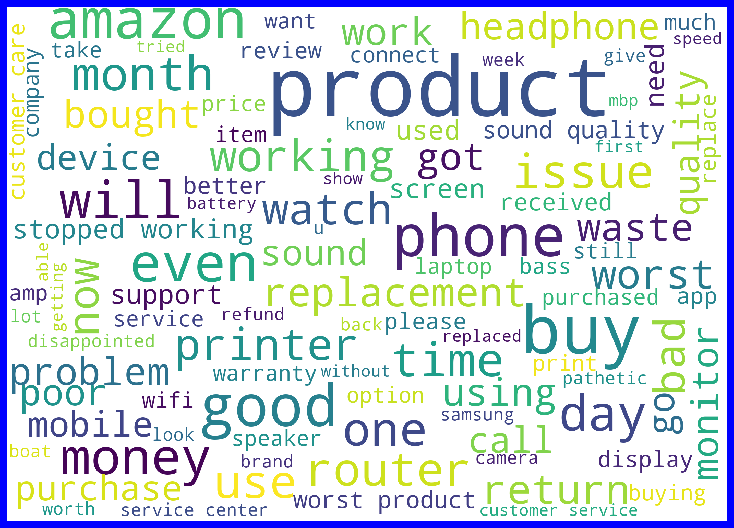

In [50]:
#Let's plot the loud words with Rating 5
from wordcloud import WordCloud

df5=df['Review'][df['Ratings']==5]

spam_cloud = WordCloud(width=700,height=500,background_color='white',stopwords = stopwords,max_words = 100,max_font_size = 80,scale = 3,random_state = 1).generate(' '.join(df1))

plt.figure(figsize=(10,8),facecolor='blue')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)

Observations:

        1. From the above plots we can clearly see the words which are indication of Reviewer's opinion on products.
        2. Here most frequent words used for each Rating is displayed in the word cloud.


In [51]:
#Checking the value counts of Ratings column
df.Ratings.value_counts()

5    30444
1    13406
4    13323
3    11501
2     9939
Name: Ratings, dtype: int64

In [52]:
# Separating feature and label
x = df['Review']
y = df['Ratings']

In [53]:
#using the n_gram tfidf vectorizer(Word vectors)
from sklearn.feature_extraction.text import TfidfVectorizer
word_vectorizer = TfidfVectorizer(
                                sublinear_tf = True,
                                strip_accents = 'unicode',
                                analyzer = 'word',
                                token_pattern = r'\w{1,}',
                                stop_words = 'english',
                                ngram_range = (1,3),
                                max_features = 100000)
word_vectorizer.fit(x)
train_word_features = word_vectorizer.transform(x)

In [54]:
#Character vectorizer
char_vectorizer = TfidfVectorizer(
                                sublinear_tf = True,
                                strip_accents = 'unicode',
                                analyzer = 'char',
                                stop_words = 'english',
                                ngram_range = (2,6),
                                max_features = 50000)
char_vectorizer.fit(x)
train_char_features = char_vectorizer.transform(x)

In [55]:
#I will combine both word vectors and character vectors as input for our model
from scipy.sparse import hstack
train_features = hstack([train_char_features,train_word_features])

In [56]:
# Evaluation Metrics
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_curve,accuracy_score,roc_auc_score,hamming_loss, log_loss

In [57]:
# Splitting train and test data
seed = 1
x_train, x_test, y_train, y_test = train_test_split(train_features, y, test_size = 0.25, random_state = seed)

In [58]:
#lets check the shapes of traning and test data
print("x_train", x_train.shape)
print("x_test", x_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

x_train (58959, 150000)
x_test (19654, 150000)
y_train (58959,)
y_test (19654,)


In [59]:
#Checking the value counts of Ratings column
y.value_counts()

5    30444
1    13406
4    13323
3    11501
2     9939
Name: Ratings, dtype: int64

In [60]:
#Checking the number of classes before fit
from collections import Counter
print("The number of classes before fit{}".format(Counter(y_train)))

The number of classes before fitCounter({5: 22806, 1: 10079, 4: 10019, 3: 8605, 2: 7450})


In [61]:
# Oversample and plot imbalanced dataset with SMOTE
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

# transforming the dataset
os=SMOTE(sampling_strategy = {1: 22806, 2: 22806, 3: 22806, 4: 22806, 5: 22806})
x_train_ns,y_train_ns=os.fit_resample(x_train,y_train)

print("The number of classes before fit{}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fitCounter({5: 22806, 1: 10079, 4: 10019, 3: 8605, 2: 7450})
The number of classes after fit Counter({1: 22806, 3: 22806, 5: 22806, 2: 22806, 4: 22806})


So now we have successfully balanced the data. Let's proceed with model building.

In [62]:
# Importing libraries for ML Algorithms
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB,BernoulliNB
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

In [65]:
# defining the algorithms
rf = RandomForestClassifier()
DTC = DecisionTreeClassifier()
svc = LinearSVC()
lr = LogisticRegression(solver='lbfgs')
mnb = MultinomialNB()
bnb = BernoulliNB()
sgd = SGDClassifier()

In [66]:
#creating a function to train and test the model with evaluation
def BuiltModel(model):
    print('*'*30+model.__class__.__name__+'*'*30)
    model.fit(x_train_ns,y_train_ns)
    y_pred = model.predict(x_train_ns)
    pred = model.predict(x_test)

    accuracy = accuracy_score(y_test,pred)*100

    print(f"Accuracy Score:", accuracy)
    print("---------------------------------------------------")

    #confusion matrix & classification report
    
    print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred)}")
    print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred)}\n")

In [67]:
# Running multiple algorithms
for model in [lr,svc,DTC,sgd,rf]:
    BuiltModel(model)

******************************LogisticRegression******************************
Accuracy Score: 67.7928157118144
---------------------------------------------------
CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           1       0.69      0.76      0.73      3327
           2       0.51      0.47      0.49      2489
           3       0.51      0.49      0.50      2896
           4       0.53      0.56      0.54      3304
           5       0.85      0.83      0.84      7638

    accuracy                           0.68     19654
   macro avg       0.62      0.62      0.62     19654
weighted avg       0.68      0.68      0.68     19654

Confusion Matrix : 
 [[2536  429  239   76   47]
 [ 622 1162  493  138   74]
 [ 319  453 1421  501  202]
 [  87  150  427 1846  794]
 [  98   69  192  920 6359]]

******************************LinearSVC******************************
Accuracy Score: 70.55561208914216
---------------------------------------------------
CL